<a href="https://colab.research.google.com/github/sharon-nasimiyu/Automation-and-Prediction-of-data/blob/main/IMAGE_RECOGNITION_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


PROBLEM STATEMENT:Design your own method or modify existing algorithm(s) to process and 
recognize images of handwritten digits

In [35]:
# Define the MLP architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    '''This code defines an MLP (Multi-Layer Perceptron) architecture with three fully connected layers. 
    The input size is 28*28 (the dimensions of the MNIST images) and the output size is 10 (the number of classes - digits 0-9).
    The ReLU activation function is used in the hidden layers, and a dropout layer is added for regularization.'''
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x


In [36]:
#loading the data and preparing MNIST dataset for use in training and testing a PyTorch model. 
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

'''This code block loads the MNIST dataset and preprocesses the data using PyTorch's transforms module. Specifically, it applies two transformations to the data:
transforms.ToTensor(): Converts the input PIL image or numpy array to a PyTorch tensor.
 This allows the data to be used by PyTorch models.
transforms.Normalize(): Normalizes the tensor image with mean and standard deviation. 
 The mean and standard deviation are passed as arguments to this transformation. In this case, the mean and standard deviation are both set to 0.5.'''
train_dataset = datasets.MNIST(root='/content/train', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='/content/test', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)


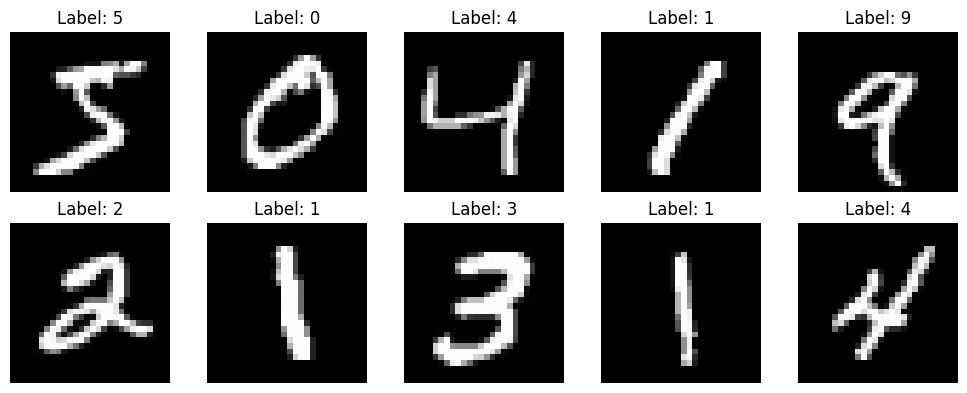

In [37]:
# Plot some sample images
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axs.flatten()):
    img, label = train_dataset[i]
    img = img.numpy().squeeze()  # convert tensor to numpy array and remove the channel dimension
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [38]:
# Instantiate the MLP model and set the loss function and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
'''This code instantiates the MLP model, sets the loss function to CrossEntropyLoss and the optimizer to Adam. 
The model been defined in the previous step and the optimizer is used to optimize the model's parameters during training'''



"This code instantiates the MLP model, sets the loss function to CrossEntropyLoss and the optimizer to Adam. \nThe model been defined in the previous step and the optimizer is used to optimize the model's parameters during training"

In [39]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))



Epoch [1/10], Step [100/469], Loss: 0.7848
Epoch [1/10], Step [200/469], Loss: 0.7661
Epoch [1/10], Step [300/469], Loss: 0.7406
Epoch [1/10], Step [400/469], Loss: 0.5248
Epoch [2/10], Step [100/469], Loss: 0.5058
Epoch [2/10], Step [200/469], Loss: 0.4066
Epoch [2/10], Step [300/469], Loss: 0.4267
Epoch [2/10], Step [400/469], Loss: 0.3856
Epoch [3/10], Step [100/469], Loss: 0.2476
Epoch [3/10], Step [200/469], Loss: 0.3380
Epoch [3/10], Step [300/469], Loss: 0.4483
Epoch [3/10], Step [400/469], Loss: 0.4007
Epoch [4/10], Step [100/469], Loss: 0.3884
Epoch [4/10], Step [200/469], Loss: 0.3308
Epoch [4/10], Step [300/469], Loss: 0.2798
Epoch [4/10], Step [400/469], Loss: 0.3289
Epoch [5/10], Step [100/469], Loss: 0.2595
Epoch [5/10], Step [200/469], Loss: 0.4001
Epoch [5/10], Step [300/469], Loss: 0.4157
Epoch [5/10], Step [400/469], Loss: 0.3178
Epoch [6/10], Step [100/469], Loss: 0.2479
Epoch [6/10], Step [200/469], Loss: 0.3599
Epoch [6/10], Step [300/469], Loss: 0.2680
Epoch [6/10

In [40]:
# Split the training set into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Define data loaders for the training, validation, and test sets
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)


In [51]:
train_dataset_size = len(train_loader.dataset)
test_dataset_size = len(test_loader.dataset)

print(f"Training dataset size: {train_dataset_size}")
print(f"Test dataset size: {test_dataset_size}")


Training dataset size: 48000
Test dataset size: 10000


In [41]:
# Validate the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy on the validation set: {} %'.format(100 * correct / total))


Accuracy on the validation set: 91.76666666666667 %


**CONFUSION MATRIX**

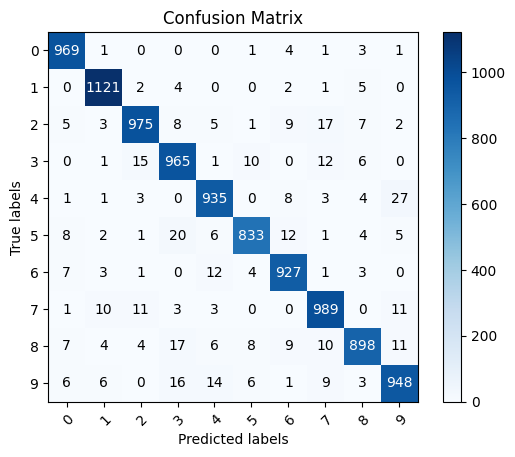

In [42]:
# Set model to evaluation mode
model.eval()

# Create empty list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over test data and get true and predicted labels
for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    true_labels += labels.numpy().tolist()
    predicted_labels += predicted.numpy().tolist()

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Create colormap
cmap = plt.get_cmap('Blues')

# Create figure and axes for plot
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap=cmap)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(10):
    for j in range(10):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > np.max(conf_matrix) / 2. else "black")

# Show plot
plt.show()


In [47]:
# Define the three classes
class1 = [0, 1, 2, 3]
class2 = [4, 5, 6]
class3 = [7, 8, 9]

# Set model to evaluation mode
model.eval()

# Create empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over test data and get true and predicted labels
for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    true_labels += labels.numpy().tolist()
    predicted_labels += predicted.numpy().tolist()

# Create empty confusion matrix
conf_matrix = np.zeros((3, 3))

# Fill the confusion matrix
for true, predicted in zip(true_labels, predicted_labels):
    if true in class1:
        true_index = 0
    elif true in class2:
        true_index = 1
    else:
        true_index = 2
        
    if predicted in class1:
        predicted_index = 0
    elif predicted in class2:
        predicted_index = 1
    else:
        predicted_index = 2
        
    conf_matrix[true_index, predicted_index] += 1

# Print the confusion matrix
print(conf_matrix)


[[4069.   33.   55.]
 [  47. 2737.   48.]
 [  85.   47. 2879.]]


In [43]:
# Get true and predicted labels for test data
true_labels = []
predicted_labels = []
for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    true_labels += labels.numpy().tolist()
    predicted_labels += predicted.numpy().tolist()

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Extract the positives and negatives from the confusion matrix
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]

# Print the positives and negatives
print("True positives:", true_positives)
print("False positives:", false_positives)
print("True negatives:", true_negatives)
print("False negatives:", false_negatives)


True positives: 1121
False positives: 1
True negatives: 969
False negatives: 0


In [50]:
per_class_acc = []
for i in range(len(conf_matrix)):
    class_total = conf_matrix[i].sum()
    class_correct = conf_matrix[i][i]
    class_acc = 100 * class_correct / class_total
    per_class_acc.append(class_acc)
    print(f"Accuracy for class {i}: {class_acc:.2f}%")


Accuracy for class 0: 97.88%
Accuracy for class 1: 96.65%
Accuracy for class 2: 95.62%


**CLASSIFICATION REPORT**

In [44]:
#The code is used for performance measurement of the model

import torch
from sklearn.metrics import classification_report

# inside the test loop
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_labels = []
    all_predicted = []
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels += labels.tolist()
        all_predicted += predicted.tolist()
    
    print('Accuracy of the model on the test images: {:.2f}%'.format(100 * correct / total))
    print(classification_report(all_labels, all_predicted))


Accuracy of the model on the test images: 95.60%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.93      0.96      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.97      0.93      0.95       892
           6       0.95      0.97      0.96       958
           7       0.95      0.96      0.95      1028
           8       0.96      0.92      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



**OVERALL ACCURACY**

In [45]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the model on the test images: {:.2f}%'.format(100 * correct / total))


Accuracy of the model on the test images: 95.60%
